# An introduction to Turing 

[Turing](https://github.com/yebai/Turing.jl) is a general-purpose probabilistic programming system in Julia. Here we describe how to run a very simple Turing program. A *probabilistic program* is Julia code wrapped in a `@model` macro. It can use arbitrary Julia code, but to ensure correctness of inference it should not have external effects or modify global state. 

You can create your own `@model` using any distribution within the Distributions package. The list of such distributions supported is comprehensive: 
http://distributionsjl.readthedocs.io/en/latest/ 

In [26]:
# Load packages
using Turing, Distributions
using Gadfly

## A simple Gaussian model

In [ ]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

## Inference by Markov Chain Monte Carlo

In [ ]:
c = sample(gdemo([1.5, 2]), PG(50,300));

In [9]:
# Describe the result.
describe(c)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
            Mean         SD       Naive SE       MCSE         ESS   
      m 1.192834808 0.799165776 0.0461398576 0.0831603454  92.350911
     lp 0.000000000 0.000000000 0.0000000000 0.0000000000 300.000000
elapsed 0.011376975 0.072543667 0.0041883106 0.0057929807 156.817614
      s 2.141655333 2.163129574 0.1248883442 0.1819931033 141.271712

Quantiles:
             2.5%        25.0%       50.0%       75.0%       97.5%   
      m -0.4220143904 0.700932209 1.185494211 1.707831176 2.687968717
     lp  0.0000000000 0.000000000 0.000000000 0.000000000 0.000000000
elapsed  0.0043794275 0.004833098 0.005248796 0.006006934 0.010130767
      s  0.6033110480 1.026451703 1.527325477 2.330446490 7.074100736



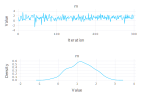

In [23]:
vstack(plot(c)[1:2])

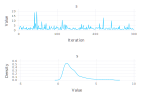

In [24]:
vstack(plot(c)[7:8])

In [ ]:
c2 = sample(gdemo([1.5, 2]), HMC(1000, 0.3, 10));

In [8]:
describe(c2)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
            Mean          SD       Naive SE       MCSE        ESS   
      m  1.158800332 0.794204913 0.0251149645 0.0374710677 449.23440
     lp -5.751460643 1.119665284 0.0354069251 0.0763981009 214.78864
elapsed  0.004410719 0.077950281 0.0024650043 0.0027883703 781.50987
      s  2.103228720 1.706877123 0.0539761939 0.1021960923 278.95615

Quantiles:
             2.5%         25.0%        50.0%        75.0%         97.5%    
      m -0.3815677074  0.701808437  1.171733776  1.6189023132  2.7083030467
     lp -9.0523231365 -6.186499046 -5.433010431 -4.9461294289 -4.6264967557
elapsed  0.0012362785  0.001295749  0.001347415  0.0015903818  0.0027180085
      s  0.5781128375  1.054542116  1.582762492  2.5045977668  7.2142205896



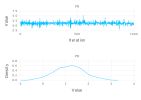

In [17]:
vstack(plot(c2)[1:2])

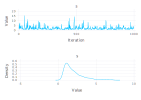

In [21]:
vstack(plot(c2)[7:8])